## Fisher's Scoring for Logistic Regression

In this notebook, we implement Fisher's Scoring by using the Newton-Raphson optimization method to mimize the empirical loss for logistic regression.

Consider the average empirical loss (the risk) for logistic regression on $m$ training examples, given by

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m \log\left(1 + e^{-y^{(i)}\theta^Tx^{(i)}}\right) = -\frac{1}{m} \sum_{i=1}^m \log(h_\theta(y^{(i)}x^{(i)}))
$$

where the output $y^{(i)} \in \{-1, 1\}$, and the hypothesis is of the form $h_\theta(x) = g(\theta^T x)$ with $g(z) = 1/(1+e^{-z})$ being the sigmoid function. 

We start off by finding the gradient of $J(\theta)$ with respect to the parameter vector $\theta$. For all $j=\{1,2,...,n\}$, 

$$\begin{align*}
(\nabla_\theta J(\theta))_j = \frac{\partial}{\partial\theta_j} J(\theta)
&= \frac{\partial}{\partial\theta_j} \left[-\frac{1}{m} \sum_{i=1}^m \log(h_\theta(y^{(i)}x^{(i)}))\right] \\
&= \frac{\partial}{\partial\theta_j} \left[-\frac{1}{m} \sum_{i=1}^m \log g(y^{(i)}\theta^T x^{(i)})\right] \\
&= -\frac{1}{m} \sum_{i=1}^m \frac{\partial}{\partial\theta_j} \log g(y^{(i)}\theta^T x^{(i)}) \\
&= -\frac{1}{m} \sum_{i=1}^m \left[g(y^{(i)}\theta^T x^{(i)}) \right]^{-1} g'(y^{(i)}\theta^T x^{(i)}) \frac{\partial}{\partial\theta_j} y^{(i)} \sum_{k=1}^n \theta_k x_k^{(i)} \\
&= -\frac{1}{m} \sum_{i=1}^m \left[g(y^{(i)}\theta^T x^{(i)}) \right]^{-1} g(y^{(i)}\theta^T x^{(i)})\left[1 - g(y^{(i)}\theta^T x^{(i)})\right] y^{(i)}x_j^{(i)} \\
&= -\frac{1}{m} \sum_{i=1}^m \left[1 - g(y^{(i)}\theta^T x^{(i)})\right] y^{(i)}x_j^{(i)},
\end{align*}$$

where the fourth equality uses the distributive property of partial differentiation, and the sixth equality uses the convenient fact that for the sigmoid function, $g'(z) = g(z)[1-g(z)]$.

The next step is to find the Hessian of $J(\theta)$ with respect to $\theta$. For all $j, k = \{1,2,...,n\}$,

$$\begin{align*}
(\nabla_\theta^2 J(\theta))_{jk} = \frac{\partial^2}{\partial\theta_j\partial\theta_k} J(\theta) &= 
\frac{\partial}{\partial\theta_k}\left[\frac{\partial}{\partial\theta_j} J(\theta) \right] \\
&= \frac{\partial}{\partial\theta_k} \left(-\frac{1}{m}\sum_{i=1}^m \left[1-g(y^{(i)}\theta^T x^{(i)}\right] y^{(i)}x_j^{(i)}\right) \\
&= -\frac{1}{m} \sum_{i=1}^m \frac{\partial}{\partial\theta_k} \left[y^{(i)}x_j^{(i)} - y^{(i)}x_j^{(i)}g\left(y^{(i)}\theta^T x^{(i)}\right)\right] \\
&= -\frac{1}{m} \sum_{i=1}^m \left[0 - y^{(i)}x_j^{(i)} g'\left(y^{(i)}\theta^T x^{(i)}\right) \frac{\partial}{\partial\theta_k} y^{(i)} \sum_{l=1}^n\theta_l x_l^{(i)} \right] \\
&= \frac{1}{m} \sum_{i=1}^m g\left(y^{(i)}\theta^T x^{(i)}\right) \left[1 - g\left(y^{(i)}\theta^T x^{(i)}\right) \right] (y^{(i)})^2 x_j^{(i)} x_k^{(i)} \\
&= \frac{1}{m} \sum_{i=1}^m g\left(y^{(i)}\theta^T x^{(i)}\right) \left[1 - g\left(y^{(i)}\theta^T x^{(i)}\right) \right] x_j^{(i)} x_k^{(i)}, 
\end{align*}$$

where the fifth equality uses the same property $g'(z) = g(z)\left[1-g(z)\right]$ of the sigmoid function. Notice that the expression $x_j^{(i)} x_k^{(i)}$ for all $j, k = \{1,2,...,n\}$ corresponds to the outer product between the vectors $x^{(i)}\left(x^{(i)}\right)^T$. It follows that the above can be written as

$$
H = \nabla_\theta^2 J(\theta) = \frac{1}{m}\sum_{i=1}^m g\left(y^{(i)}\theta^T x^{(i)}\right) \left[1 - g\left(y^{(i)}\theta^T x^{(i)}\right) \right] x^{(i)} \left(x^{(i)}\right)^T.
$$




For any minimization algorithm to work on the loss function $J(\theta)$, $J(\theta)$ needs to be convex. It turns out that $J(\theta)$ is convex if its Hessian $H$ is positive semi-definite, which we can easily show. Notice that by definition of the sigmoid function, $0 \leq g(z) \leq 1$ for all $z\in \mathbb{R}$, and so consequently $0 \leq g(z)\left[1-g(z)\right] \leq 1$. Now, let $z \in \mathbb{R}$ be given. Then,

$$\begin{align*}
z^T H z &= z^T \left(\frac{1}{m}\sum_{i=1}^m g\left(y^{(i)}\theta^T x^{(i)}\right) \left[1 - g\left(y^{(i)}\theta^T x^{(i)}\right) \right] x^{(i)} \left(x^{(i)}\right)^T\right) z \\
&= \frac{1}{m} \sum_{i=1}^m g\left(y^{(i)}\theta^T x^{(i)}\right) \left[1 - g\left(y^{(i)}\theta^T x^{(i)}\right) \right] z^T x^{(i)} \left(x^{(i)}\right)^T z \\
&= \frac{1}{m} \sum_{i=1}^m g\left(y^{(i)}\theta^T x^{(i)}\right) \left[1 - g\left(y^{(i)}\theta^T x^{(i)}\right) \right] \left((x^{(i)})^T z\right)^2 \geq 0,
\end{align*}$$

where the last inequality follows because $0 \leq g(z)\left[1-g(z)\right] \leq 1$ for all $z\in \mathbb{R}$ as noted earlier and $\left((x^{(i)})^T z\right)^2$ is always a non-negative quantity. Because $z\in \mathbb{R}$ was arbitrary, it follows that $H$ is positive semi-definite, and so $J(\theta)$ is convex i.e. $J(\theta)$ has only one (global) minimum.

Now we are in a position to implement logistic regression on a sample dataset. First, we'll import the following libraries that will be useful.

In [2]:
import numpy as np               # for numerical operations
import scipy.special as sp       # for the sigmoid function
import matplotlib.pyplot as plt  # to visualize the logistic regression decision boundary

Next, we'll read in the input and output files (downloadable from http://cs229.stanford.edu/ps/ps1) as numpy arrays.

In [3]:
X_raw = np.genfromtxt('logistic_x.txt', dtype = float)
Y = np.genfromtxt('logistic_y.txt', dtype = float)

We'll concatenate a column of 1s to the input array to represent the bias, and visualize the first five rows of the input array i.e. the features of the first five training examples.

In [6]:
X = np.concatenate((np.ones((99, 1)), X_raw), axis = 1)
print(X[:5])

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]


Next, we'll store the number of training examples, and initialize all parameters to zero.

In [8]:
M = X.shape[0]
theta = np.zeros(3)  # 2 features plus 1 bias

Now, we'll implement the main training loop that performs the parameter update, given by

$$\theta := \theta - H^{-1}\nabla_\theta J(\theta).$$

To avoid nested for loops within each training iteration, we will vectorize the operations by computing the components of the above update rule for all training examples simulatneously. This can be done efficiently using numpy methods, as shown below. Recall that we have derived the gradient and Hessian of the loss function $J(\theta)$ with respect to the parameter vector $\theta$ in the workings above.

In [9]:
# about 10 training iterations suffice
for _ in range(10):
    # compute the vectorized output of the sigmoid function
    g = sp.expit(Y * np.sum(theta * X, axis = 1))
    # compute the gradient using all training examples
    grad = -(1/M) * np.sum((np.reshape((np.ones(M) - g) * Y, newshape = (99, 1))) * X, axis = 0)
    # use a for loop to construct the hessian using all training examples
    mat = np.empty((99, 0))
    for j in range(len(theta)):
        for k in range(len(theta)):
            mat = np.append(mat, X[:,[j]] * X[:,[k]], axis = 1)
    hess_flat = (1/M) * np.sum(np.reshape(g * (np.ones(M) - g), newshape = (99, 1)) * mat, axis = 0)
    hess = np.reshape(hess_flat, newshape = (len(theta), len(theta)))
    # perform parameter update
    theta = theta - np.dot(np.linalg.inv(hess), grad)
    # compute and print loss
    loss = (1/M) * np.sum(np.log(1 + np.exp(-Y * np.sum(theta * X, axis = 1))), axis = 0)
    print("Loss is %.8f" % loss)


Loss is 0.37472471
Loss is 0.33425014
Loss is 0.32928120
Loss is 0.32914756
Loss is 0.32914743
Loss is 0.32914743
Loss is 0.32914743
Loss is 0.32914743
Loss is 0.32914743
Loss is 0.32914743


As expected, the average empirical loss decreases with each iteration, and seems to converge quickly in under 10 iterations. The trained parameters after 10 iterations are printed below. These correspond to the weights associated with the bias, $x_1$ and $x_2$ respectively.

In [12]:
print("Trained parameters are (bias first): ", theta)

Trained parameters are (bias first):  [-2.6205116   0.76037154  1.17194674]


We finish by visualizing the learnt decision boundary along with the training examples and their true classifications.

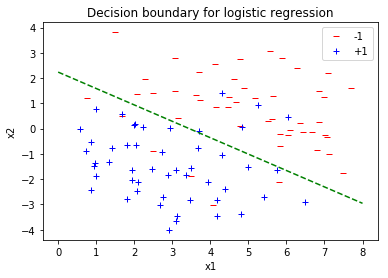

In [13]:
# plot classification of training data
plt.plot(X[Y==1, 1], X[Y==1 ,2], "r_", label = "-1")
plt.plot(X[Y==-1, 1], X[Y==-1, 2], "b+", label = "+1")
plt.xlabel("x1"); plt.ylabel("x2")	
plt.legend()

# define function to plot decision boundary
def graph(formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.plot(x, y, "g--")

# plot decision boundary and show complete plot
graph(formula = "(1/theta[2]) * (-theta[0] - theta[1] * x)", x_range = range(0, 9))
plt.title("Decision boundary for logistic regression")
plt.show()